# PDK

gdsfactory includes a generic PDK class. Only one PDK can be active at a time.

The PDK allows you to register:
- `cell` functions that return Components from a ComponentSpec (string, Component, ComponentFactory or dict)
- `cross_section` functions that return CrossSection from a CrossSection Spec (string, CrossSection, CrossSectionFactory or dict)
- `layers` that returns a GDS Layer from a string, an int or a Tuple[int, int]


You can only have one active PDK at a time.
Thanks to PDK you can access components, cross_sections or layers using a string.

Depending on the active pdk:

- `get_layer` returns a Layer from the registed layers.
- `get_component` returns a Component from the registered cells or containers.
- `get_cross_section` returns a CrossSection from the registered cross_sections.

## layers

GDS layers are a tuple of two integer number `gdslayer/gdspurpose`

The easiest way to define your layermap is using a Klayout `lyp` file to generate the layers code.

In [1]:
import gdsfactory as gf
from gdsfactory.layers import lyp_to_dataclass
from gdsfactory.config import PATH

print(lyp_to_dataclass(PATH.klayout_lyp))

2022-05-31 23:07:42.825 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.8.3



from pydantic import BaseModel
from gdsfactory.types import Layer


class LayerMap(BaseModel):
    CAPACITOR: Layer = (42, 0)
    DEEPETCH: Layer = (3, 6)
    DEEPTRENCH: Layer = (4, 0)
    DICING: Layer = (65, 0)
    DRC_EXCLUDE: Layer = (67, 0)
    DRC_MARKER: Layer = (205, 0)
    DevRec: Layer = (68, 0)
    ERROR_MARKER: Layer = (207, 0)
    Errors: Layer = (66, 0)
    FLOORPLAN: Layer = (64, 0)
    FbrTgt: Layer = (81, 0)
    GE: Layer = (5, 0)
    GENPP: Layer = (26, 0)
    GEPPP: Layer = (29, 0)
    LABEL: Layer = (201, 0)
    LABEL_INSTANCES: Layer = (206, 0)
    LABEL_SETTINGS: Layer = (202, 0)
    Lumerical: Layer = (733, 0)
    M1: Layer = (41, 0)
    M1TILES: Layer = (191, 0)
    M2: Layer = (45, 0)
    M3: Layer = (49, 0)
    METALOPEN: Layer = (46, 0)
    MH: Layer = (47, 0)
    N: Layer = (20, 0)
    NOTILE_M1: Layer = (71, 0)
    NOTILE_M2: Layer = (72, 0)
    NOTILE_M3: Layer = (73, 0)
    NP: Layer = (22, 0)
    NPP: Layer = (24, 0)
    OXIDE_ETCH: Layer = (6, 0)
    

In [2]:

from pydantic import BaseModel
from gdsfactory.types import Layer


class LayerMap(BaseModel):
    WG: Layer = (1, 0)
    DEVREC: Layer = (68, 0)
    PORT: Layer = (1, 10)
    PORTE: Layer = (1, 11)
    LABEL: Layer = (201, 0)
    LABEL_INSTANCES: Layer = (206, 0)
    LABEL_SETTINGS: Layer = (202, 0)
    LUMERICAL: Layer = (733, 0)
    M1: Layer = (41, 0)
    M2: Layer = (45, 0)
    M3: Layer = (49, 0)
    N: Layer = (20, 0)
    NP: Layer = (22, 0)
    NPP: Layer = (24, 0)
    OXIDE_ETCH: Layer = (6, 0)
    P: Layer = (21, 0)
    PDPP: Layer = (27, 0)
    PP: Layer = (23, 0)
    PPP: Layer = (25, 0)
    PinRec: Layer = (1, 10)
    PinRecM: Layer = (1, 11)
    SHALLOWETCH: Layer = (2, 6)
    SILICIDE: Layer = (39, 0)
    SIM_REGION: Layer = (100, 0)
    SITILES: Layer = (190, 0)
    SLAB150: Layer = (2, 0)
    SLAB150CLAD: Layer = (2, 9)
    SLAB90: Layer = (3, 0)
    SLAB90CLAD: Layer = (3, 1)
    SOURCE: Layer = (110, 0)
    TE: Layer = (203, 0)
    TEXT: Layer = (66, 0)
    TM: Layer = (204, 0)
    Text: Layer = (66, 0)
    VIA1: Layer = (44, 0)
    VIA2: Layer = (43, 0)
    VIAC: Layer = (40, 0)
    WGCLAD: Layer = (111, 0)
    WGN: Layer = (34, 0)
    WGNCLAD: Layer = (36, 0)

    class Config:
        frozen = True
        extra = "forbid"


LAYER = LayerMap()

## cross_sections

You can create a `CrossSection` from scratch or you can customize the cross_section functions in `gf.cross_section`

In [3]:
import gdsfactory as gf

strip2 = gf.partial(gf.cross_section.strip, layer=(2, 0))

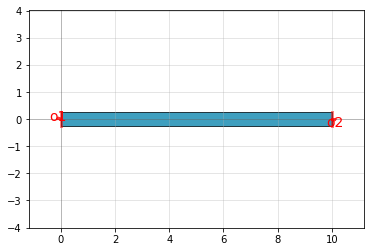

straight_bf73fda8: uid 0, ports ['o1', 'o2'], aliases [], 4 polygons, 0 references

In [4]:
c = gf.components.straight(cross_section=strip2)
c

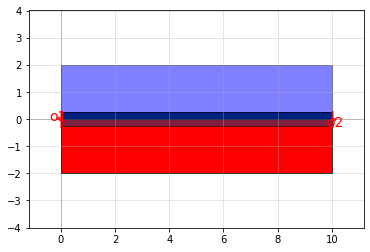

straight_0cfc69af: uid 2, ports ['o1', 'o2'], aliases [], 6 polygons, 0 references

In [5]:
import gdsfactory as gf

pin = gf.partial(
    gf.cross_section.strip,
    sections=(
        gf.tech.Section(width=2, layer=gf.LAYER.N, offset=+1),
        gf.tech.Section(width=2, layer=gf.LAYER.P, offset=-1),
    ),
)
c = gf.components.straight(cross_section=pin)
c

In [6]:
strip_wide = gf.partial(gf.cross_section.strip, width=3)

In [7]:
strip = gf.partial(
    gf.cross_section.strip, auto_widen=True
)  # auto_widen tapers to wider waveguides for lower loss in long straight sections.

In [8]:
cross_sections = dict(strip_wide=strip_wide, pin=pin, strip=strip)

## cells

Cells are functions that return Components. You can customize the function default arguments easily thanks to `functools.partial`

Lets customize the default arguments of a library of cells.

For example, you can make some wide MMIs for a particular technology. Lets say the best MMI width you found it to be 9um.

In [9]:
import gdsfactory as gf

mmi1x2 = gf.partial(gf.components.mmi1x2, width_mmi=9)
mmi2x2 = gf.partial(gf.components.mmi2x2, width_mmi=9)

cells = dict(mmi1x2=mmi1x2, mmi2x2=mmi2x2)

## LayerSpec, ComponentSpec, CrossSectionSpec

When you regiser Layers, ComponentFactories (cells) and CrossSectionFactories (cross_sections), you can access them by a string.

### LayerSpec

You can access layers from the active Pdk using the layer name or a tuple/list of two numbers.

In [10]:
pdk1 = gf.Pdk(
    name="fab1",
    layers=LAYER.dict(),
    cross_sections=cross_sections,
    cells=cells,
    base_pdk=gf.pdk.GENERIC,
)
pdk1.activate()

In [11]:
pdk1.get_layer("WG")

(1, 0)

In [12]:
pdk1.get_layer([1, 0])

[1, 0]

### CrossSectionSpec

You can access cross_sections from the pdk from the cross_section name, or using a dict to customize the CrossSection

In [13]:
pdk1.get_cross_section("pin")

CrossSection(layer='WG', width=0.5, offset=0.0, radius=10.0, width_wide=None, auto_widen=False, auto_widen_minimum_length=200.0, taper_length=10.0, bbox_layers=[], bbox_offsets=[], cladding_layers=['DEVREC'], cladding_offsets=(0.0,), sections=[Section(width=2.0, offset=1.0, layer=(20, 0), port_names=(None, None), port_types=('optical', 'optical'), name=None, hidden=False), Section(width=2.0, offset=-1.0, layer=(21, 0), port_names=(None, None), port_types=('optical', 'optical'), name=None, hidden=False)], port_names=('o1', 'o2'), port_types=('optical', 'optical'), min_length=0.01, start_straight_length=0.01, end_straight_length=0.01, snap_to_grid=None, decorator=None, add_pins=functools.partial(<function add_pins_siepic at 0x7fa29a0ec700>, pin_length=0.002), add_bbox=<function add_bbox_siepic at 0x7fa29a0ec790>, info={}, name=None)

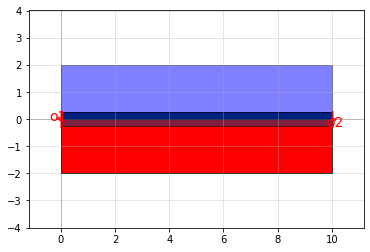

straight_08fed0dd: uid 4, ports ['o1', 'o2'], aliases [], 6 polygons, 0 references

In [14]:
cross_section_spec_string = "pin"
gf.components.straight(cross_section=cross_section_spec_string)

layer='WG' width=2.0 offset=0.0 radius=10.0 width_wide=None auto_widen=False auto_widen_minimum_length=200.0 taper_length=10.0 bbox_layers=[] bbox_offsets=[] cladding_layers=['DEVREC'] cladding_offsets=(0.0,) sections=[Section(width=2.0, offset=1.0, layer=(20, 0), port_names=(None, None), port_types=('optical', 'optical'), name=None, hidden=False), Section(width=2.0, offset=-1.0, layer=(21, 0), port_names=(None, None), port_types=('optical', 'optical'), name=None, hidden=False)] port_names=('o1', 'o2') port_types=('optical', 'optical') min_length=0.01 start_straight_length=0.01 end_straight_length=0.01 snap_to_grid=None decorator=None add_pins=functools.partial(<function add_pins_siepic at 0x7fa29a0ec700>, pin_length=0.002) add_bbox=<function add_bbox_siepic at 0x7fa29a0ec790> info={} name=None


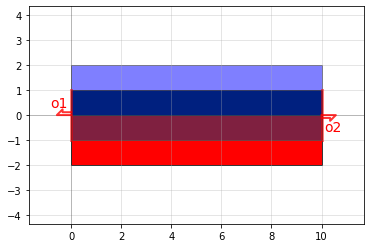

straight_361ab848: uid 5, ports ['o1', 'o2'], aliases [], 6 polygons, 0 references

In [15]:
cross_section_spec_dict = dict(cross_section="pin", settings=dict(width=2))
print(pdk1.get_cross_section(cross_section_spec_dict))
gf.components.straight(cross_section=cross_section_spec_dict)

### ComponentSpec

You can get Component from the pdk using the cell name (string) or a dict.


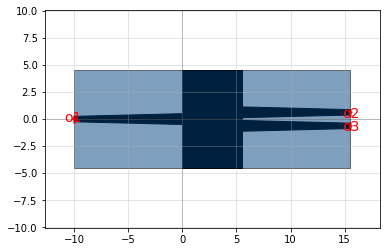

mmi1x2_5fdc3e44: uid 7, ports ['o1', 'o2', 'o3'], aliases [], 19 polygons, 0 references

In [16]:
pdk1.get_component("mmi1x2")

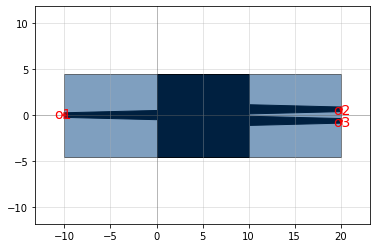

mmi1x2_7fd7e42f: uid 11, ports ['o1', 'o2', 'o3'], aliases [], 19 polygons, 0 references

In [17]:
pdk1.get_component(dict(component="mmi1x2", settings=dict(length_mmi=10)))

Now you can define PDKs for different Fabs

### FabA

FabA only has one waveguide layer available that is defined in GDS layer (30, 0)

The waveguide traces are 2um wide.

(34, 0)


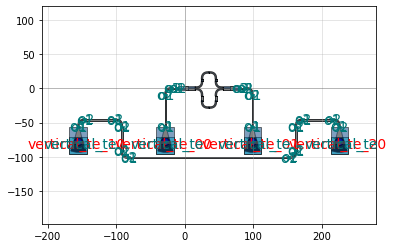

mzi_add_fiber_array_52dfbbdd: uid 36, ports ['vertical_te_00', 'vertical_te_01', 'vertical_te_10', 'vertical_te_20'], aliases [], 0 polygons, 22 references

In [18]:
import gdsfactory as gf
from gdsfactory.types import Layer
from pydantic import BaseModel


class LayerMap(BaseModel):
    WG: Layer = (34, 0)
    SLAB150: Layer = (2, 0)
    DEVREC: Layer = (68, 0)
    PORT: Layer = (1, 10)
    PORTE: Layer = (1, 11)
    TE: Layer = (203, 0)
    TM: Layer = (204, 0)
    TEXT: Layer = (66, 0)


WIDTH = 2
LAYER = LayerMap()

# Specify a cross_section to use
strip = gf.partial(gf.cross_section.strip, width=WIDTH, layer=LAYER.WG)

mmi1x2 = gf.partial(
    gf.components.mmi1x2,
    width=WIDTH,
    width_taper=WIDTH,
    width_mmi=3 * WIDTH,
    cross_section=strip,
)

generic_pdk = gf.pdk.GENERIC

fab_a = gf.Pdk(
    name="Fab_A",
    cells=dict(mmi1x2=mmi1x2),
    cross_sections=dict(strip=strip),
    layers=LAYER.dict(),
    base_pdk=generic_pdk,
)
fab_a.activate()

gc = gf.partial(
    gf.components.grating_coupler_elliptical_te, layer=LAYER.WG, cross_section=strip
)

c = gf.components.mzi()
c_gc = gf.routing.add_fiber_array(component=c, grating_coupler=gc)
c_gc

you can also add a cell `decorator` in case you want to add some cladding layers for bends

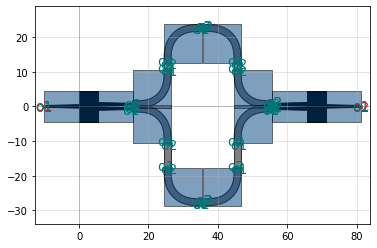

mzi_316dd769: uid 53, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [19]:
import gdsfactory as gf
from gdsfactory.add_pins import add_outline


def decorator(component) -> None:
    """Fab specific functions over a component."""
    add_outline(component)


mmi2x2 = gf.partial(gf.components.mmi2x2, width_mmi=9)
mmi1x2 = gf.partial(gf.components.mmi1x2, width_mmi=9)
bend_euler = gf.partial(gf.components.bend_euler, decorator=decorator)
straight = gf.partial(gf.components.straight)
mzi = gf.partial(gf.components.mzi, splitter=mmi1x2, bend=bend_euler, straight=straight)

mzi10 = mzi(delta_length=10)
mzi10

### FabB

FabB has photonic waveguides that require many cladding layers to avoid dopants

Lets say that the waveguides are defined in layer (2, 0) and are 0.3um wide

(2, 0)


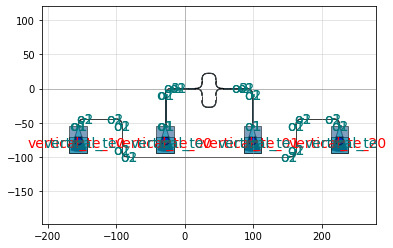

mzi_fb202aa3_add_fiber__b601031a: uid 75, ports ['vertical_te_00', 'vertical_te_01', 'vertical_te_10', 'vertical_te_20'], aliases [], 0 polygons, 22 references

In [20]:
import gdsfactory as gf
from gdsfactory.difftest import difftest
from pydantic import BaseModel

WIDTH = 0.3


class LayerMap(BaseModel):
    WG: Layer = (2, 0)
    SLAB150: Layer = (2, 0)
    DEVREC: Layer = (68, 0)
    PORT: Layer = (1, 10)
    PORTE: Layer = (1, 11)
    TE: Layer = (203, 0)
    TM: Layer = (204, 0)
    TEXT: Layer = (66, 0)
    LABEL: Layer = (201, 0)


LAYER = LayerMap()

strip = gf.partial(
    gf.cross_section.strip,
    width=WIDTH,
    layer=LAYER.WG,
)

straight = gf.partial(gf.components.straight, cross_section=strip)
bend_euler = gf.partial(gf.components.bend_euler, cross_section=strip)
mmi1x2 = gf.partial(
    gf.components.mmi1x2,
    cross_section=strip,
    width=WIDTH,
    width_taper=WIDTH,
    width_mmi=4 * WIDTH,
)
mzi = gf.partial(gf.components.mzi, cross_section=strip, splitter=mmi1x2)
gc = gf.partial(
    gf.components.grating_coupler_elliptical_te, layer=LAYER.WG, cross_section=strip
)

cells = dict(
    gc=gc,
    mzi=mzi,
    mmi1x2=mmi1x2,
    bend_euler=bend_euler,
    straight=straight,
    taper=gf.components.taper,
)
cross_sections = dict(strip=strip)

pdk = gf.Pdk(
    name="fab_b", cells=cells, cross_sections=cross_sections, layers=LAYER.dict()
)
pdk.activate()


c = mzi()
wg_gc = gf.routing.add_fiber_array(component=c, grating_coupler=gc, cross_section=strip)
wg_gc

### FabC

Lets assume that fab C has both Silicon and Silicon Nitride components, and you need different waveguide widths for C and O band.

Lets asume that O band nitride waveguide width is 0.9 and Cband Nitride waveguide width is 1um, and for 0.4um for Silicon O band and 0.5um for silicon Cband.

Lets also that this foundry has an LVS flow where all components have optical pins defined in layer (100, 0)

In [21]:
from typing import Callable, Dict, Optional, Tuple
import pydantic.dataclasses as dataclasses

import gdsfactory as gf
from gdsfactory.add_pins import add_pin_rectangle_inside
from gdsfactory.component import Component, ComponentReference
from gdsfactory.cross_section import cross_section
from gdsfactory.tech import LayerLevel, LayerStack, Tech
from gdsfactory.types import Layer


@dataclasses.dataclass(frozen=True)
class LayerMap:
    WG: Layer = (10, 1)
    WG_CLAD: Layer = (10, 2)
    WGN: Layer = (34, 0)
    WGN_CLAD: Layer = (36, 0)
    PIN: Layer = (100, 0)
    SLAB150: Layer = (2, 0)
    DEVREC: Layer = (68, 0)
    PORT: Layer = (1, 10)
    PORTE: Layer = (1, 11)
    TE: Layer = (203, 0)
    TM: Layer = (204, 0)
    TEXT: Layer = (66, 0)
    LABEL: Layer = (201, 0)


LAYER = LayerMap()
WIDTH_NITRIDE_OBAND = 0.9
WIDTH_NITRIDE_CBAND = 1.0
PORT_TYPE_TO_LAYER = dict(optical=(100, 0))


def get_layer_stack_fab_c(thickness: float = 350.0) -> LayerStack:
    """Returns generic LayerStack"""
    return LayerStack(
        layers=dict(
            core=LayerLevel(
                layer=(34, 0),
                thickness=350.0,
                zmin=220.0 + 100.0,
            ),
            clad=LayerLevel(layer=(36, 0)),
        )
    )


def add_pins(
    component: Component,
    function: Callable = add_pin_rectangle_inside,
    pin_length: float = 0.5,
    port_layer: Layer = LAYER.PIN,
    **kwargs,
) -> Component:
    """Add Pin port markers.

    Args:
        component: to add ports
        function:
        pin_length:
        port_layer:
        function: kwargs

    """
    for p in component.ports.values():
        function(
            component=component,
            port=p,
            layer=port_layer,
            layer_label=port_layer,
            pin_length=pin_length,
            **kwargs,
        )
    return component


# cross_sections

bbox_layers = [LAYER.WGN_CLAD]
bbox_offsets = [3]

fabc_nitride_cband = gf.partial(
    cross_section,
    width=WIDTH_NITRIDE_CBAND,
    layer=LAYER.WGN,
    bbox_layers=bbox_layers,
    bbox_offsets=bbox_offsets,
    add_pins=add_pins,
)
fabc_nitride_oband = gf.partial(
    cross_section,
    width=WIDTH_NITRIDE_OBAND,
    layer=LAYER.WGN,
    bbox_layers=bbox_layers,
    bbox_offsets=bbox_offsets,
    add_pins=add_pins,
)


# LEAF COMPONENTS have pins

mmi1x2_nitride_c = gf.partial(
    gf.components.mmi1x2,
    width=WIDTH_NITRIDE_CBAND,
    cross_section=fabc_nitride_cband,
)
mmi1x2_nitride_o = gf.partial(
    gf.components.mmi1x2,
    width=WIDTH_NITRIDE_OBAND,
    cross_section=fabc_nitride_oband,
)
bend_euler_c = gf.partial(
    gf.components.bend_euler,
    cross_section=fabc_nitride_cband,
)
straight_c = gf.partial(
    gf.components.straight,
    cross_section=fabc_nitride_cband,
)
bend_euler_o = gf.partial(
    gf.components.bend_euler,
    cross_section=fabc_nitride_oband,
)
straight_o = gf.partial(
    gf.components.straight,
    cross_section=fabc_nitride_oband,
)

gc_nitride_c = gf.partial(
    gf.components.grating_coupler_elliptical_te,
    grating_line_width=0.6,
    layer=LAYER.WGN,
    cross_section=fabc_nitride_cband,
)

# HIERARCHICAL COMPONENTS made of leaf components

mzi_nitride_c = gf.partial(
    gf.components.mzi,
    cross_section=fabc_nitride_cband,
    splitter=mmi1x2_nitride_c,
    straight=straight_c,
    bend=bend_euler_c,
)
mzi_nitride_o = gf.partial(
    gf.components.mzi,
    cross_section=fabc_nitride_oband,
    splitter=mmi1x2_nitride_o,
    straight=straight_o,
    bend=bend_euler_o,
)

(34, 0)


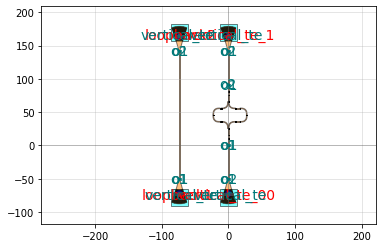

mzi_f732a140_move_2317d_eda806cd: uid 113, ports ['vertical_te_00', 'vertical_te_1', 'loopback1', 'loopback2'], aliases [], 0 polygons, 8 references

In [22]:
mzi = mzi_nitride_c()
mzi_gc = gf.routing.add_fiber_single(
    component=mzi,
    grating_coupler=gc_nitride_c,
    cross_section=fabc_nitride_cband,
    optical_routing_type=1,
    straight=straight_c,
    bend=bend_euler_c,
)
mzi_gc

In [23]:
ls = get_layer_stack_fab_c()

## PDK Testing

To make sure all your PDK Pcells produce the components that you want, it's important to test your PDK.

As you write your own component factories you want to make sure you do not break them later on. You can write tests to avoid unwanted regressions.

Make sure you create a test like this an name it with test_ prefix so Pytest can find it.


In [24]:
"""This code tests all your cells in the PDK

it will test 3 things:

1. difftest: will test the GDS geometry of a new GDS compared to a reference. Thanks to Klayout fast booleans.add()
2. settings test: will compare the settings in YAML with a reference YAML file.add()
3. ensure ports are on grid, to avoid port snapping errors that can create 1nm gaps later on when you build circuits.

"""

import pathlib

import pytest
from pytest_regressions.data_regression import DataRegressionFixture

import gdsfactory as gf
from gdsfactory.difftest import difftest

try:
    dirpath = pathlib.Path(__file__).absolute().with_suffix(".gds")
except Exception:
    dirpath = pathlib.Path.cwd()

    
component_names = list(pdk.cells.keys())
factory = pdk.cells


@pytest.fixture(params=component_names, scope="function")
def component_name(request) -> str:
    return request.param


def test_gds(component_name: str) -> None:
    """Avoid regressions in GDS names, shapes and layers.
    Runs XOR and computes the area."""
    component = factory[component_name]()
    test_name = f"fabc_{component_name}"
    difftest(component, test_name=test_name, dirpath=dirpath)


def test_settings(component_name: str, data_regression: DataRegressionFixture) -> None:
    """Avoid regressions in component settings and ports."""
    component = factory[component_name]()
    data_regression.check(component.to_dict())


def test_assert_ports_on_grid(component_name: str):
    """Ensures all ports are on grid to avoid 1nm gaps"""
    component = factory[component_name]()
    component.assert_ports_on_grid()